![example](images/director_shot.jpeg)

# Microsoft New Movie Studio

**Author:** Brian Gikonyo
***

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

***
Questions to consider:
* 
* 
* 
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

## Data Understanding

In the folder Data in the associated GitHub repository are movie datasets from:

   * Box Office Mojo
   * IMDB
   * Rotten Tomatoes
   * TheMovieDB.org
   ***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

In [20]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3


%matplotlib inline

In [21]:
#reading bom
bom = pd.read_csv("data/bom.movie_gross.csv")
bom

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [22]:
#reading tmdb
tmdb_movies = pd.read_csv("data/tmdb.movies.csv")
tmdb_movies

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


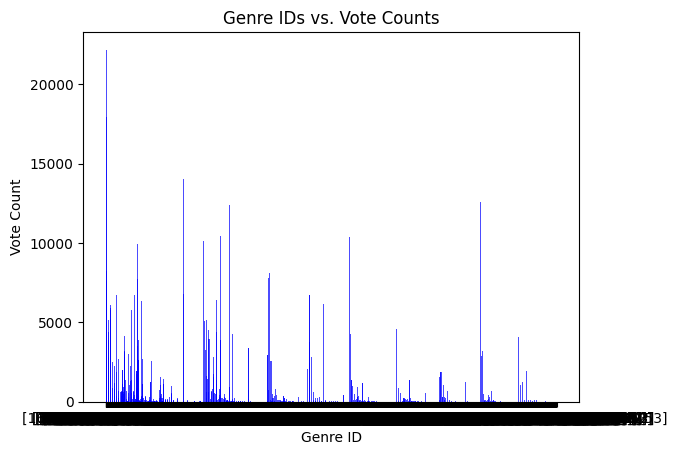

In [23]:
#defining popularity
# Extract relevant columns
genre_ids = tmdb_movies['genre_ids']
vote_counts = tmdb_movies['vote_count']

# Plot the data
plt.bar(genre_ids, vote_counts, color='blue', alpha=0.7)

# Add labels and title
plt.xlabel('Genre ID')
plt.ylabel('Vote Count')
plt.title('Genre IDs vs. Vote Counts')

# Show the plot
plt.show()

In [51]:
#reading movie budgets
movie_budgets = pd.read_csv("data/tn.movie_budgets.csv")
movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [53]:
movie_budgets["worldwide_gross"] = movie_budgets["worldwide_gross"].replace("[$,]", "", regex=True).astype(np.float64)
movie_budgets["production_budget"] = movie_budgets["production_budget"].replace("[$,]", "", regex=True).astype(np.float64)
movie_budgets["domestic_gross"] = movie_budgets["domestic_gross"].replace("[$,]", "", regex=True).astype(np.float64)

movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000.0,0.0,0.000000e+00
5778,79,"Apr 2, 1999",Following,6000.0,48482.0,2.404950e+05
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1.338000e+03
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.0,0.0,0.000000e+00


In [25]:
#reading im database
im_db = "data/im.db"

conn = sqlite3.connect(im_db)
cursor = conn.cursor()


## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

In [26]:
#bom preparation
bom_cleaned = bom.dropna()
bom_cleaned


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000,2018
3286,The Catcher Was a Spy,IFC,725000.0,229000,2018
3309,Time Freak,Grindstone,10000.0,256000,2018
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200,2018


In [27]:
bom_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2007 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2007 non-null   object 
 1   studio          2007 non-null   object 
 2   domestic_gross  2007 non-null   float64
 3   foreign_gross   2007 non-null   object 
 4   year            2007 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 94.1+ KB


In [28]:
#removing duplicated from bom
bom_cleaned = bom_cleaned.drop_duplicates()
bom_cleaned.info()

#no duplicates

<class 'pandas.core.frame.DataFrame'>
Index: 2007 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2007 non-null   object 
 1   studio          2007 non-null   object 
 2   domestic_gross  2007 non-null   float64
 3   foreign_gross   2007 non-null   object 
 4   year            2007 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 94.1+ KB


In [29]:
tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [30]:
#tmdb_movies preparation
tmdb_movies_cleaned = tmdb_movies.dropna()
tmdb_movies_cleaned = tmdb_movies_cleaned.drop_duplicates()
tmdb_movies_cleaned

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [54]:
#Movie budgets cleaning
movie_budgets_cleaned = movie_budgets.dropna()
movie_budgets_cleaned = movie_budgets_cleaned.drop_duplicates()
movie_budgets_cleaned

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000.0,0.0,0.000000e+00
5778,79,"Apr 2, 1999",Following,6000.0,48482.0,2.404950e+05
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1.338000e+03
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.0,0.0,0.000000e+00


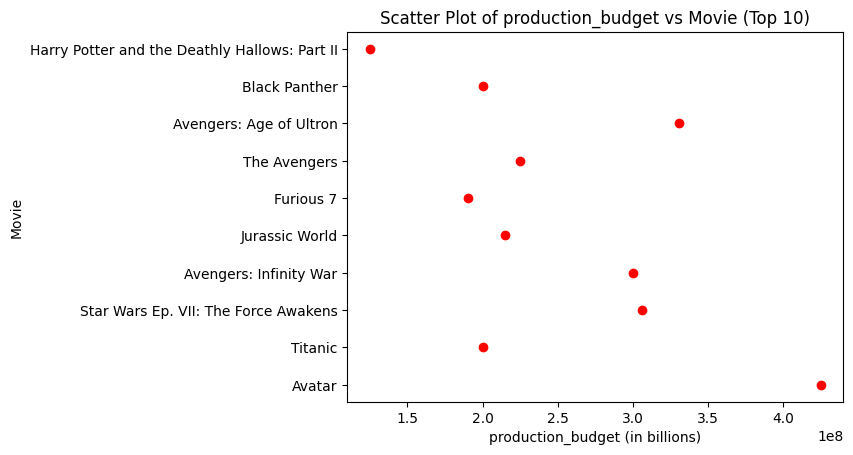

In [62]:
# Get the top 10 records based on the 'worldwide_gross' column
top_10_budgets = movie_budgets.nlargest(10, 'worldwide_gross')

# Scatter plot for the top 10 records
plt.scatter(top_10_budgets["production_budget"], top_10_budgets["movie"], color="red")
plt.title('Scatter Plot of production_budget vs Movie (Top 10)')
plt.xlabel('production_budget (in billions)')
plt.ylabel('Movie')
plt.show()

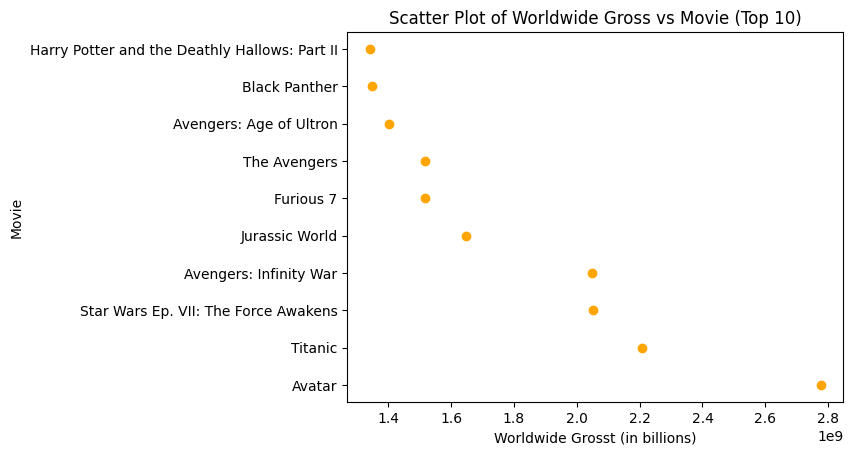

In [63]:
# Get the top 10 records based on the 'worldwide_gross' column
top_10_budgets = movie_budgets.nlargest(10, 'worldwide_gross')

# Scatter plot for the top 10 records
plt.scatter(top_10_budgets["worldwide_gross"], top_10_budgets["movie"], color="orange")
plt.title('Scatter Plot of Worldwide Gross vs Movie (Top 10)')
plt.xlabel('Worldwide Grosst (in billions)')
plt.ylabel('Movie')
plt.show()

## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

In [32]:
movies_high_ratings = """
SELECT movie_ratings.movie_id, movie_ratings.averagerating, movie_basics.primary_title, movie_basics.genres
FROM movie_ratings
JOIN movie_basics ON movie_ratings.movie_id = movie_basics.movie_id
WHERE movie_ratings.averagerating >=5
;
"""

pd.read_sql(movies_high_ratings, conn)

,movie_id,averagerating,primary_title,genres
0,tt10356526,8.3,Laiye Je Yaarian,Romance
1,tt10384606,8.9,Borderless,Documentary
2,tt1042974,6.4,Just Inès,Drama
3,tt1060240,6.5,Até Onde?,"Mystery,Thriller"
4,tt1069246,6.2,Habana Eva,"Comedy,Romance"
...,...,...,...,...
60777,tt9783738,7.4,Bangkok Dark Tales,Horror
60778,tt9805820,8.1,Caisa,Documentary
60779,tt9844256,7.5,Code Geass: Lelouch of the Rebellion - Glorifi...,"Action,Animation,Sci-Fi"
60780,tt9886934,7.0,The Projectionist,Documentary


In [33]:
# Deleting null values in im
table_name = 'movie_basics'
column_name = 'genres'


query = f"DELETE FROM {table_name} WHERE {column_name} IS NULL"
cursor.execute(query)


conn.commit()



In [34]:
#Listing genres
table_name = 'movie_basics'
column_name = 'genres'

query = f"SELECT DISTINCT {column_name} FROM {table_name}"
cursor.execute(query)

unique_elements = cursor.fetchall()

for element in unique_elements:
    print(element[0])

Action,Crime,Drama
Biography,Drama
Drama
Comedy,Drama
Comedy,Drama,Fantasy
Comedy
Horror,Thriller
Adventure,Animation,Comedy
Documentary,History
Biography
History
Documentary
Animation,Drama,History
Drama,Mystery
Action,Animation,Comedy
Crime,Drama
Biography,Comedy,Drama
Action,Drama
Sci-Fi
Thriller
Action,Adventure,Fantasy
Drama,Romance
Adventure,Animation,Sci-Fi
Drama,Horror
Drama,Mystery,Thriller
Drama,Family
Adventure,Comedy,Romance
Adventure,Drama,Romance
Comedy,Crime,Drama
Horror
Adventure,Comedy,Drama
Drama,Sci-Fi,Thriller
Action
Comedy,Drama,Romance
Action,Adventure,Sci-Fi
Crime,Drama,Thriller
Comedy,Family
Adventure
Drama,History,War
Action,Thriller
Comedy,Crime
Action,Sci-Fi,Thriller
Fantasy
Drama,Mystery,Sci-Fi
Biography,Drama,History
Action,Comedy,Crime
Action,Adventure,Drama
Action,Adventure,Thriller
Horror,Mystery,Thriller
Action,Drama,Family
Comedy,Drama,Music
Drama,Fantasy,Horror
Drama,Romance,Sci-Fi
Adventure,Romance
Drama,Thriller
Action,Drama,War
Drama,Romance,War
Cr

Documentary: 32185
Drama: 21486
Comedy: 9177
Horror: 4372
Comedy,Drama: 3519


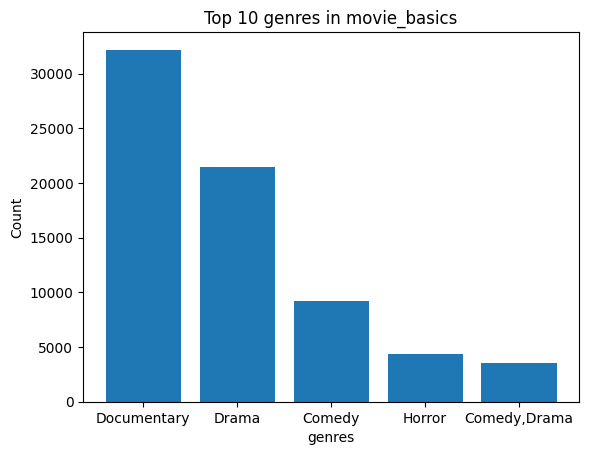

In [70]:
table_name = 'movie_basics'
column_name = 'genres'

query = f"SELECT {column_name}, COUNT(*) as count FROM {table_name} GROUP BY {column_name} ORDER BY count DESC LIMIT 5"
cursor.execute(query)

value_counts = cursor.fetchall()

# Close the cursor and the connection



# Display the ordered and limited value counts
for value, count in value_counts:
    print(f"{value}: {count}")
    
labels, counts = zip(*value_counts)
plt.bar(labels, counts)
plt.xlabel(column_name)
plt.ylabel('Count')
plt.title("Top 10 {column_name} in {table_name}')
plt.show()

# Highly rated Movie Genres

According to above table, highly rated movie genres include:
* Documentary
* Drama
* Comedy
* Horror

In [36]:
conn = sqlite3.connect('data/tmdb_movie.db')

# Write the DataFrame to an SQLite table (replace 'your_table' with the desired table name)
tmdb_movies_cleaned.to_sql('tmdb_movies', conn, index=False, if_exists='replace')



26517

In [37]:
tmdb_movies = """
SELECT original_title, popularity
FROM  tmdb_movies
ORDER BY popularity DESC
;
"""

pd.read_sql(tmdb_movies, conn)

,original_title,popularity
0,Avengers: Infinity War,80.773
1,John Wick,78.123
2,Spider-Man: Into the Spider-Verse,60.534
3,The Hobbit: The Battle of the Five Armies,53.783
4,The Avengers,50.289
...,...,...
26512,Laboratory Conditions,0.600
26513,_EXHIBIT_84xxx_,0.600
26514,The Last One,0.600
26515,Trailer Made,0.600


In [38]:
popular_movies = """
SELECT original_title, popularity
FROM tmdb_movies
WHERE popularity > 45
ORDER BY popularity DESC
;
"""

pd.read_sql(popular_movies, conn)

,original_title,popularity
0,Avengers: Infinity War,80.773
1,John Wick,78.123
2,Spider-Man: Into the Spider-Verse,60.534
3,The Hobbit: The Battle of the Five Armies,53.783
4,The Avengers,50.289
5,Guardians of the Galaxy,49.606
6,Blade Runner 2049,48.571
7,Blade Runner 2049,48.571
8,Fantastic Beasts: The Crimes of Grindelwald,48.508
9,Ralph Breaks the Internet,48.057


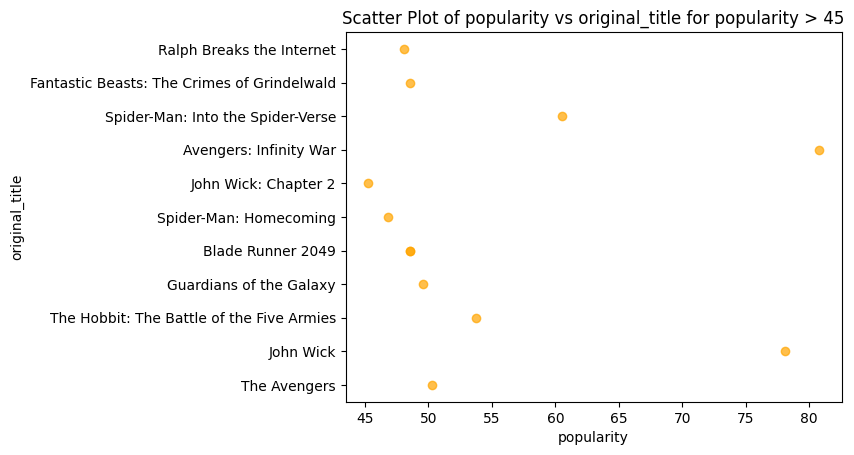

In [39]:
table_name = 'tmdb_movies'
x_column = 'popularity'
y_column = 'original_title'
threshold = 45  # Replace with the desired threshold

# Execute a query to get the values of x_column and y_column with a condition
query = f"SELECT {x_column}, {y_column} FROM {table_name} WHERE {x_column} > ?"
df = pd.read_sql_query(query, conn, params=(threshold,))

# Close the connection


# Plot the data
plt.scatter(df[x_column], df[y_column], color='orange', alpha=0.7)
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.title(f'Scatter Plot of {x_column} vs {y_column} for {x_column} > {threshold}')
plt.show()

In [40]:
#reading im database
im_db = "data/im.db"

conn = sqlite3.connect(im_db)
cursor = conn.cursor()
#checking if most popular movie is highly rated

avengers_infinity_war_id = """
SELECT movie_id, primary_title, genres
FROM movie_basics
WHERE movie_basics.primary_title = "Avengers: Infinity War"
;
"""

pd.read_sql(avengers_infinity_war_id, conn)


,movie_id,primary_title,genres
0,tt4154756,Avengers: Infinity War,"Action,Adventure,Sci-Fi"


***
Note the genres 

* Action
* Adventure
* Sci-Fi

In [41]:
the_movie_id = "tt4154756"

avengers_infinity_war_rating = """
SELECT movie_id, averagerating
FROM movie_ratings
WHERE movie_id = "tt4154756"
;
"""

pd.read_sql(avengers_infinity_war_rating, conn)

conn.close()

This suggests that the movie had a high rating and was popular among the viewers.

In [42]:
conn = sqlite3.connect('data/movie_budgets.db')

# Write the DataFrame to an SQLite table (replace 'your_table' with the desired table name)
movie_budgets_cleaned.to_sql('movie_budgets', conn, index=False, if_exists='replace')



5782

In [43]:
avengers_infinity_war_budget = """
SELECT movie, production_budget, worldwide_gross
FROM movie_budgets
WHERE movie = "Avengers: Infinity War"
;
"""

pd.read_sql(avengers_infinity_war_budget, conn)

,movie,production_budget,worldwide_gross
0,Avengers: Infinity War,"$300,000,000","$2,048,134,200"


This shows that the movie had a high worldwide gross and a profit of $2,048,134,200 - $300,000,000 off the budget =  $1,748,134,200.

In [44]:
im_db = "data/im.db"

conn = sqlite3.connect(im_db)
cursor = conn.cursor()

spiderman_id = """
SELECT movie_id, primary_title, genres
FROM movie_basics
WHERE movie_basics.primary_title = "Spider-Man: Into the Spider-Verse"
;
"""

pd.read_sql(spiderman_id, conn)

,movie_id,primary_title,genres
0,tt4633694,Spider-Man: Into the Spider-Verse,"Action,Adventure,Animation"


***
Note genre
* Action
* Adventure
* Animation

In [45]:
spiderman_id = "tt4633694"

spiderman_rating = """
SELECT movie_id, averagerating
FROM movie_ratings
WHERE movie_id = "tt4633694"
;
"""

pd.read_sql(spiderman_rating, conn)

,movie_id,averagerating
0,tt4633694,8.5


In [71]:
spiderman_budget = """
SELECT movie, production_budget, worldwide_gross
FROM movie_budgets
WHERE movie = "Spider-Man: Into The Spider-Verse 3D"
;
"""

pd.read_sql(spiderman_budget, conn)

DatabaseError: Execution failed on sql '
SELECT movie, production_budget, worldwide_gross
FROM movie_budgets
WHERE movie = "Spider-Man: Into The Spider-Verse 3D"
;
': no such table: movie_budgets

This shows that the movie had a high worldwide gross and a profit of $285,381,768 from a gross of $375,381,768 - $90,000,000 off the budget = $285,381,768.

# Movies to avoid

In [ ]:
unpopular_movies = """
SELECT original_title, popularity
FROM tmdb_movies
WHERE popularity < 5
ORDER BY popularity ASC
LIMIT  15
;
"""

pd.read_sql(unpopular_movies, conn)

,original_title,popularity
0,Fairview St.,0.6
1,The Spirit of Isabel,0.6
2,The Making of 'Scott Pilgrim vs. the World',0.6
3,U2360° Tour: Squaring The Circle,0.6
4,Restoring a Masterpiece: The Renovation of Eas...,0.6
5,そらのおとしもの プロジェクト,0.6
6,Shark Fights 13: Jardine vs Prangley,0.6
7,Therapissed,0.6
8,Alone on the Wall,0.6
9,Monsters and Mysteries in Alaska,0.6


## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.
# Top Genres based on ratings

* Documentary
* Drama
* Comedy
* Horror
***
# Top Genres based on high Worldwide income gains
* Action
* Adventure
* Animation
* Sci-Fi

***
Questions to consider:
* Would recommend investing in various movie genres. Note the top genres above.
* What are some reasons why your analysis might not fully solve the business problem?
* The analysis is limited 
* What else could you do in the future to improve this project?
***